# Assignment 3
### Due 9/21. Do four of five.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

1. 
- Open the NHANES (or Ames prices or college completion datasets, if you prefer)
- Find two categorical variables of interest (there are 198, and short descriptions are given in the `nhanes_meta_17_18.csv` file). Investigate their missing values (you don't have to focus on missing values for this analysis like we did with police use of force, but always be aware of how dirty the data are)
- Compute a contingency table for your categorical $X$ and $Y$
- Discuss any interesting patterns (or lack of one) that you observe

In [2]:
# Read in the csv
df = pd.read_csv('00_intro/data/nhanes_data_17_18.csv')
df.head()

/var/folders/x9/1cmzmrvn09nc1bqthfg5jkk80000gn/T/ipykernel_37490/3114034585.py:2: DtypeWarning: Columns (142) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('00_intro/data/nhanes_data_17_18.csv')


,SEQN,GeneralHealthCondition,EverBreastfedOrFedBreastmilk,AgeStoppedBreastfeedingdays,AgeFirstFedFormuladays,AgeStoppedReceivingFormuladays,AgeStartedOtherFoodbeverage,AgeFirstFedMilkdays,TypeOfMilkFirstFedWholeMilk,TypeOfMilkFirstFed2Milk,...,DaysSmokedCigsDuringPast30Days,AvgCigarettesdayDuringPast30Days,TriedToQuitSmoking,TimesStoppedSmokingCigarettes,HowLongWereYouAbleToStopSmoking,UnitOfMeasureDayweekmonthyear_2_SMQ,CurrentSelfreportedHeightInches,CurrentSelfreportedWeightPounds,TriedToLoseWeightInPastYear,TimesLost10LbsOrMoreToLoseWeight
0,93703.0,NaN,1.0,273.0,1.0,365.0,152.0,365.0,Whole or regular milk,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93704.0,NaN,1.0,60.0,3.0,365.0,126.0,365.0,Whole or regular milk,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,93705.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,63.0,165.0,0.0,11 times or more
3,93706.0,Very good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,68.0,145.0,0.0,Never
4,93707.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
# checking data types to select 2 categorical varaibles
df.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8366 entries, 0 to 8365
Data columns (total 198 columns):
 #    Column                                   Dtype  
---   ------                                   -----  
 0    SEQN                                     float64
 1    GeneralHealthCondition                   object 
 2    EverBreastfedOrFedBreastmilk             float64
 3    AgeStoppedBreastfeedingdays              float64
 4    AgeFirstFedFormuladays                   float64
 5    AgeStoppedReceivingFormuladays           float64
 6    AgeStartedOtherFoodbeverage              float64
 7    AgeFirstFedMilkdays                      float64
 8    TypeOfMilkFirstFedWholeMilk              object 
 9    TypeOfMilkFirstFed2Milk                  float64
 10   TypeOfMilkFirstFed1Milk                  float64
 11   TypeOfMilkFirstFedFatFreeMilk            float64
 12   TypeOfMilkFirstFedSoyMilk                float64
 13   TypeOfMilkFirstFedOther                  float64
 14   HowHea

In [6]:
# Picking variables: now smoke vs General health condition
# checking na, 2402 missing
df['GeneralHealthCondition'].isna().value_counts()

GeneralHealthCondition
False    5964
True     2402
Name: count, dtype: int64

In [7]:
#checking unique values counts
df['GeneralHealthCondition'].value_counts()

GeneralHealthCondition
Good         2454
Very good    1544
Fair or      1175
Excellent     619
Poor?         172
Name: count, dtype: int64

In [10]:
# checking 2nd categorical variable DoYouNowSmokeCigarettes
# check missing values: 6134 missing
df['DoYouNowSmokeCigarettes'].isna().value_counts()

DoYouNowSmokeCigarettes
True     6134
False    2232
Name: count, dtype: int64

In [11]:
# check unique values
df['DoYouNowSmokeCigarettes'].value_counts()

DoYouNowSmokeCigarettes
Not at all    1260
Every day      763
Some days      209
Name: count, dtype: int64

In [13]:
# Build contingency table
pd.crosstab(df['GeneralHealthCondition'], df['DoYouNowSmokeCigarettes'], normalize = 'columns')
# some days smoker has the highest in excellent health condition 8.24%
# Non smoker has highest in Poor 5%
# if we look at Excellent, Very Good, and good as a whole, Every day smoker have a way lower sum (close to 58%) compare to the other two categories

DoYouNowSmokeCigarettes,Every day,Not at all,Some days
GeneralHealthCondition,,,
Excellent,0.051532,0.061345,0.082474
Fair or,0.323120,0.225210,0.226804
Good,0.423398,0.431933,0.417526
Poor?,0.048747,0.050420,0.041237
Very good,0.153203,0.231092,0.231959


2. 
- Open the NHANES dataset
- Find a categorical and numeric variable of interest (there are 198, and short descriptions are given in the `nhanes_meta_17_18.csv` file). Investigate their missing values (you don't have to focus on missing values for this analysis, but always be aware of them)
- Make descriptive tables and grouped kernel density plots to represent the variation in your numeric $Y$ conditional on your categorical $X$
- Discuss any interesting patterns (or lack of one) that you observe

In [14]:
# Nhanes is already open and defined as df in question 1
# Will pick DoYouSmokeNow as categorical var and BodyMassIndex as numeric var 
# Investigate missing values for cat var: 6134 missing
df['DoYouNowSmokeCigarettes'].isna().value_counts()

DoYouNowSmokeCigarettes
True     6134
False    2232
Name: count, dtype: int64

In [15]:
# Investigate missing valeus for numeric var: 361 missing
df['BodyMassIndexKgm2'].isna().value_counts()

BodyMassIndexKgm2
False    8005
True      361
Name: count, dtype: int64

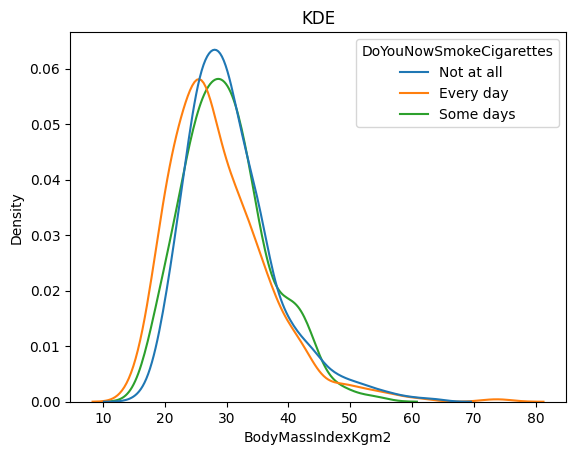

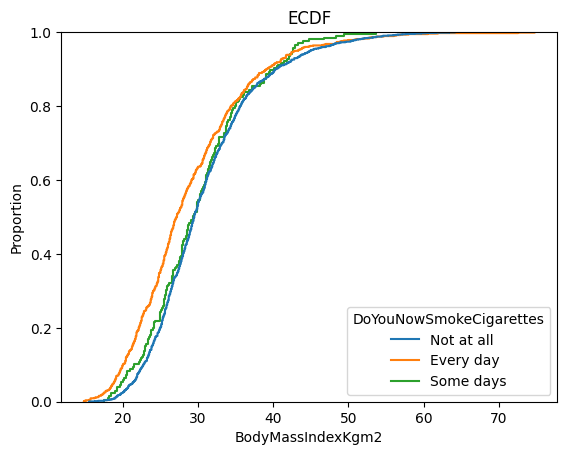

BodyMassIndexKgm2                                   \
                                    count       mean       std   min   25%   
DoYouNowSmokeCigarettes                                                      
Every day                           750.0  28.817600  8.109989  14.8  23.1   
Not at all                         1237.0  30.779871  7.393291  15.5  25.7   
Some days                           205.0  29.996585  6.857759  17.5  25.2   

                                            
                           50%   75%   max  
DoYouNowSmokeCigarettes                     
Every day                27.15  33.1  74.8  
Not at all               29.50  34.4  64.2  
Some days                29.30  33.8  53.7

In [21]:
# Make descriptive talbed and kernal density plot
# From the KDE, all lines are right skewed with the orange line has the longest tailed, suggesting more individual with high BMI
# From the descriptive table, it shows Every day smoking group has higher variance in BMI, more individuals with obesity (BMI>30) as its 75% quartile is sitting at 33.1 the lowest among all three groups. This could be related to smoking affect metabolism but also be due to other factors... like lifestyle, eating habit.
smoker='DoYouNowSmokeCigarettes'
sns.kdeplot(data=df, x='BodyMassIndexKgm2', hue=smoker, common_norm=False).set(title='KDE')
plt.show()
sns.ecdfplot(data=df, x='BodyMassIndexKgm2', hue = smoker).set(title='ECDF')
plt.show()
df.loc[:, ['BodyMassIndexKgm2', smoker]].groupby(smoker).describe()

3. 
We showed that the mean and median could be discovered by minimizing various kinds of loss functions; this is what machine learning is. To make a prediction $\hat{y}(z)$ of $Y$ when $X=z$, minimize the mean squared error:
$$
MSE(\hat{y}(z)) = \dfrac{1}{N} \sum_{i=1}^N \left\lbrace y_i - \hat{y}(z) \right\rbrace^2 \frac{1}{h}k\left(\frac{z-x_i}{h}\right)
$$
Show that the solution to this problem is the LCLS/Naradaya-Watson estimator.

## Solution

We want to minimize the weighted mean squared error:

$$MSE(\hat{y}(z)) = \frac{1}{N} \sum_{i=1}^N \left\{ y_i - \hat{y}(z) \right\}^2 \frac{1}{h}k\left(\frac{z-x_i}{h}\right)$$

**Step 1: Take the derivative with respect to $\hat{y}(z)$**

$$\frac{d}{d\hat{y}(z)} MSE(\hat{y}(z)) = \frac{1}{N} \sum_{i=1}^N \frac{d}{d\hat{y}(z)} \left\{ y_i - \hat{y}(z) \right\}^2 \frac{1}{h}k\left(\frac{z-x_i}{h}\right)$$

**Step 2: Apply chain rule**

$$\frac{d}{d\hat{y}(z)} \left\{ y_i - \hat{y}(z) \right\}^2 = 2\left\{ y_i - \hat{y}(z) \right\} \cdot (-1) = -2\left\{ y_i - \hat{y}(z) \right\}$$

**Step 3: Substitute back**

$$\frac{d}{d\hat{y}(z)} MSE(\hat{y}(z)) = \frac{1}{N} \sum_{i=1}^N -2\left\{ y_i - \hat{y}(z) \right\} \frac{1}{h}k\left(\frac{z-x_i}{h}\right)$$

**Step 4: Set derivative equal to zero (minimum condition)**

$$\frac{1}{N} \sum_{i=1}^N -2\left\{ y_i - \hat{y}(z) \right\} \frac{1}{h}k\left(\frac{z-x_i}{h}\right) = 0$$

**Step 5: Simplify and solve for $\hat{y}(z)$**

$$\sum_{i=1}^N \left\{ y_i - \hat{y}(z) \right\} \frac{1}{h}k\left(\frac{z-x_i}{h}\right) = 0$$

$$\sum_{i=1}^N y_i \frac{1}{h}k\left(\frac{z-x_i}{h}\right) - \hat{y}(z) \sum_{i=1}^N \frac{1}{h}k\left(\frac{z-x_i}{h}\right) = 0$$

$$\sum_{i=1}^N y_i \frac{1}{h}k\left(\frac{z-x_i}{h}\right) = \hat{y}(z) \sum_{i=1}^N \frac{1}{h}k\left(\frac{z-x_i}{h}\right)$$

**Step 6: Solve for $\hat{y}(z)$**

$$\hat{y}(z) = \frac{\sum_{i=1}^N y_i \frac{1}{h}k\left(\frac{z-x_i}{h}\right)}{\sum_{i=1}^N \frac{1}{h}k\left(\frac{z-x_i}{h}\right)}$$

$$\hat{y}(z) = \frac{\frac{1}{N} \sum_{i=1}^N y_i \frac{1}{h}k\left(\frac{z-x_i}{h}\right)}{\frac{1}{N} \sum_{i=1}^N \frac{1}{h}k\left(\frac{z-x_i}{h}\right)}$$


**This is exactly the LCLS (Locally Constant Least Squares) / Nadaraya-Watson estimator!

**The LCLS estimator is the solution that minimizes the kernel-weighted mean squared error

4. 
- Write a class or set of functions that implement the LCLS/Naradaya-Watson estimator, using the Silverman plug-in estimate for the conditioning variable $X$ as the bandwidth.
- From one of the course data sets, find two numeric variables of interest, analyze their relationship with the the LCLS/Naradaya-Watson estimator, and discuss your results.

In [ ]:
# Write a function implement LCLS estimator

def lcls(x, y, x_title, y_title, h=None, plot=True):
    '''
    Compute local constant least squares regression estimator with Gaussian kernel.
    '''

    n = len(x) # Number of observations
    grid = np.sort(x.unique()) # Extract and sort unique values for x

    # Compute bandwidth using Silverman's plug-in estimate, if none provided:
    if h is None:
        sigma = np.std(x, ddof=1)  # Sample standard deviation (unbiased)
        h = 1.06 * sigma * n**(-0.2)  # Silverman's plug-in estimate: h = 1.06 * σ * n^(-1/5)
        print(f'Silverman bandwidth is: {h:.4f}')

    # Compute kernel:
    I = -(x.to_numpy().reshape(-1,1)-grid.reshape(1,-1) )**2
    K = np.exp(I/(2*h**2) )/np.sqrt(2*np.pi*h**2 )

    # Compute LCLS estimator:
    numerator = y@K # Compute the numerator
    denominator = np.sum(K,axis=0) # Compute denominator
    y_hat = numerator/denominator # Compute estimator

    # Plot results:
    if plot:
        sns.scatterplot(data=df, y= y_title, x= x_title,alpha=.05)
        sns.lineplot(x=grid,y=y_hat, color='orange')

    return y_hat, grid

Original data: 8366 observations
After removing NaN: 8005 observations
NaN values in AgeInYearsAtScreening: 0
NaN values in BodyMassIndexKgm2: 361
Silverman bandwidth is: 4.2950


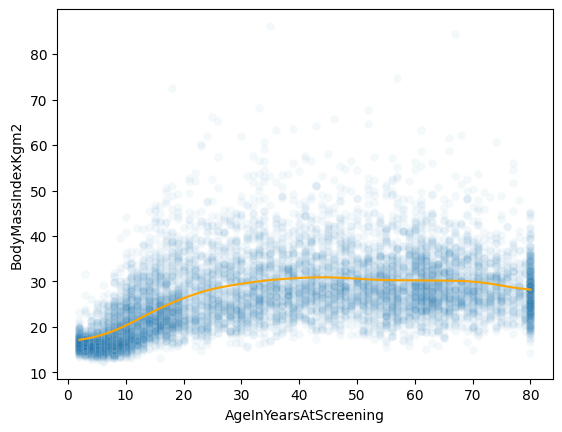

In [36]:
# Using Age & BodyMassIndex to test out this function
# BMI increases as Age increases at a decreasing rate. this stablize at age 40, slightly decline after 70
x_title = 'AgeInYearsAtScreening'
y_title = 'BodyMassIndexKgm2'

# Clean the data by removing NaN values
data_clean = df[[x_title, y_title]].dropna()
x = data_clean[x_title]
y = data_clean[y_title]

print(f"Original data: {len(df)} observations")
print(f"After removing NaN: {len(data_clean)} observations")
print(f"NaN values in {x_title}: {df[x_title].isna().sum()}")
print(f"NaN values in {y_title}: {df[y_title].isna().sum()}")

y_hat, grid = lcls(x,y, x_title, y_title)

5. 
- In any of the available data sets, investigate the relationships between pairs of variables $(X,Y)$ with a scatterplot and CEF (for example, price on area)
- Is this relationship plausibly causal, or are there missing variables that might explain at least part of the relationship between your variables? These can be "conceptual" rather than "practical"; for example, 'talent' or 'grit' probably explain education outcomes, but are almost impossible to measure. We are asking whether there are hypothetical **threats to causal identification** of the effect of $X$ on $Y$.
- Explain how, regardless of the threat to causal identification, you can still use your model to predict $Y$ given $X$, as long as you don't intervene in the system to control the outcome